In [11]:
import os
import pickle
import numpy as np
from sklearn import cluster
import pandas as pd
from matplotlib import pyplot as plt
import re
import time
from operator import itemgetter
%matplotlib inline

In [2]:
os.chdir('..')
results_dir = 'results'

In [67]:
results_files = os.listdir(results_dir)
results_files = [name for name in results_files if name.endswith('.p') and 'complex' not in name]

In [68]:
def df_from_results(results_path):
    with open(results_path,'rb') as infile:
        results = pickle.load(infile)
        
    return pd.DataFrame(results)

In [70]:
sorted(results_files)

['20_newsgroups_simple.mallet.10.topics.p',
 '20_newsgroups_simple.mallet.160.topics.p',
 '20_newsgroups_simple.mallet.20.topics.p',
 '20_newsgroups_simple.mallet.40.topics.p',
 '20_newsgroups_simple.mallet.5.topics.p',
 '20_newsgroups_simple.mallet.80.topics.p',
 '20_newsgroups_simple.p',
 'reuters_simple.mallet.10.topics.p',
 'reuters_simple.mallet.160.topics.p',
 'reuters_simple.mallet.20.topics.p',
 'reuters_simple.mallet.40.topics.p',
 'reuters_simple.mallet.5.topics.p',
 'reuters_simple.mallet.80.topics.p',
 'reuters_simple.p']

In [80]:
def plot_metrics(name,results,metrics = None,num_levels=100,save_png=True):
    if not metrics:
        metrics = [name for name in results.columns if name != 'objective']
    
    x = results.index.values[0:num_levels]
    
    cols = cycle('brgmck')
    
    plt.rcParams['figure.figsize'] = 16,9
    num_plots = len(metrics)+1
    
    # plot the objective
    plt.figure(1)
    subplot = int(str(num_plots)+str(11))
    ax1 = plt.subplot(subplot)
    c = next(cols)
    plt.plot(x, results['objective'][0:num_levels], c+'-')
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.ylabel('Clustering objective function')
    if 'reuters' in name:
        num_clusters = 43
    elif 'newsgroups' in name:
        num_clusters = 20
    actual = plt.plot([num_clusters,num_clusters],[0,1.1*results['objective'].max()],'k-')
    plt.setp(actual, linewidth = 0.5)
    
    for i,metric in enumerate(metrics):
        subplot = int(str(num_plots)+str(1)+str(i+2))
        ax = plt.subplot(subplot, sharex=ax1)
        c = next(cols)
        plt.ylabel(metric)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.ylim(0,1.1*np.max(results[metric]))
        best_index = np.where(results[metric]==results[metric].max())[0][0]
        best_index = results.index[best_index]
        plt.plot(x, results[metric][0:num_levels], c+'-')
        if(best_index <= num_levels):
            best = plt.plot([best_index,best_index],[0,1],'k--')
            plt.setp(best, linewidth=1.5)
        actual = plt.plot([num_clusters,num_clusters],[0,1],'k-')
        plt.setp(actual, linewidth = 0.5)
    
    
    plt.setp(ax.get_xticklabels(), visible=True)
    plt.xlabel('Number of leaves in the clustering')
    
    if save_png:
        plt.savefig(os.path.join(results_dir,'plots',os.path.splitext(name)[0]+'.png'))
    
    plt.show()

reuters_simple.mallet.40.topics.p


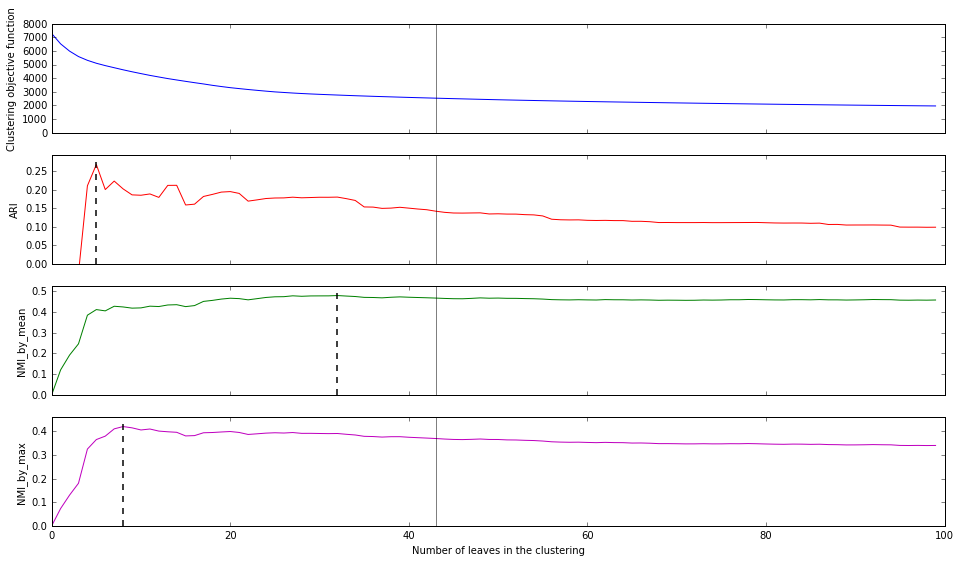

20_newsgroups_simple.p


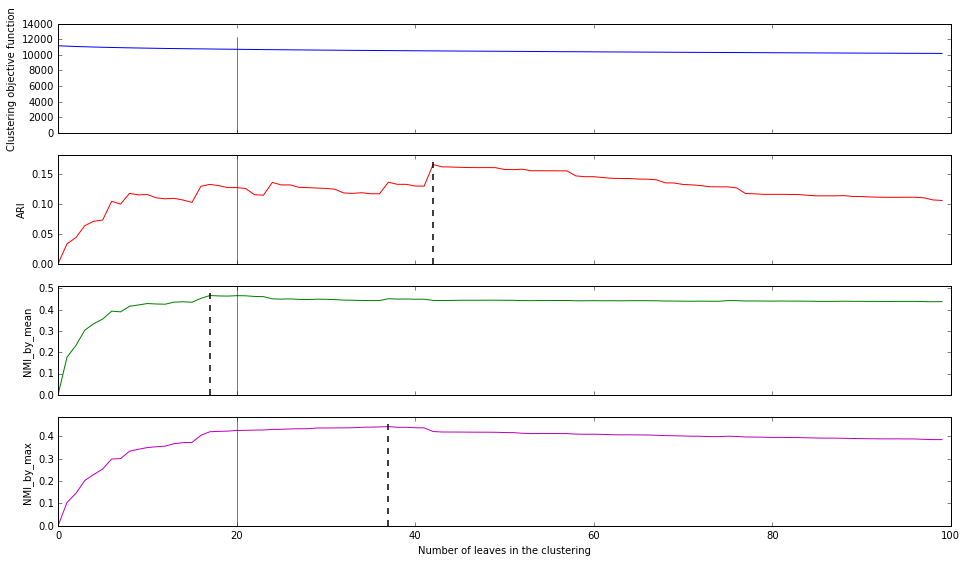

20_newsgroups_simple.mallet.10.topics.p


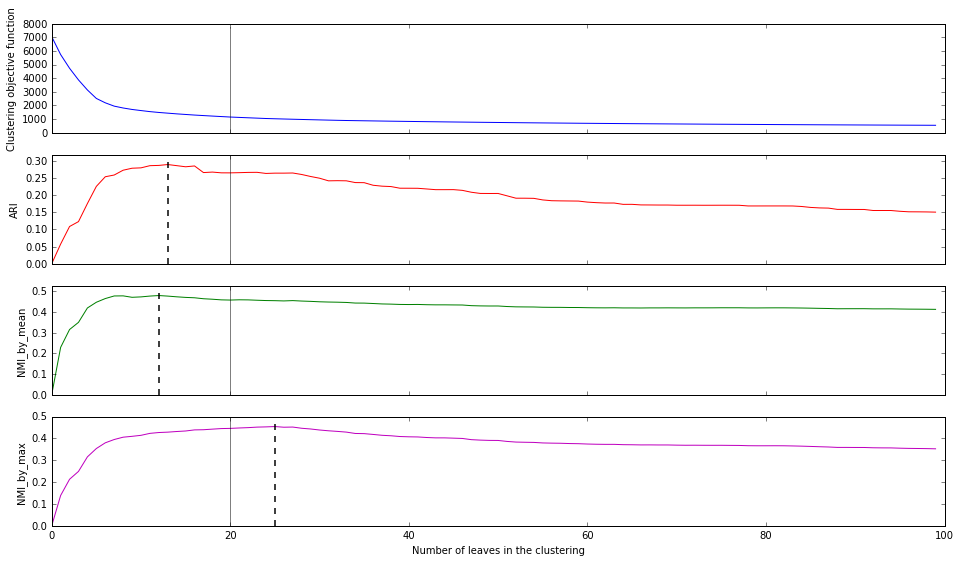

20_newsgroups_simple.mallet.40.topics.p


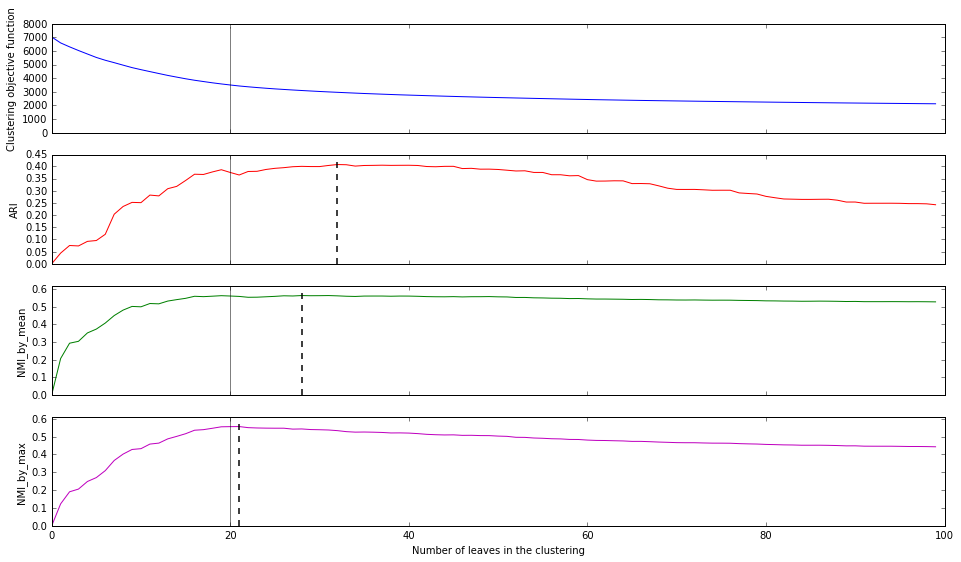

reuters_simple.mallet.10.topics.p


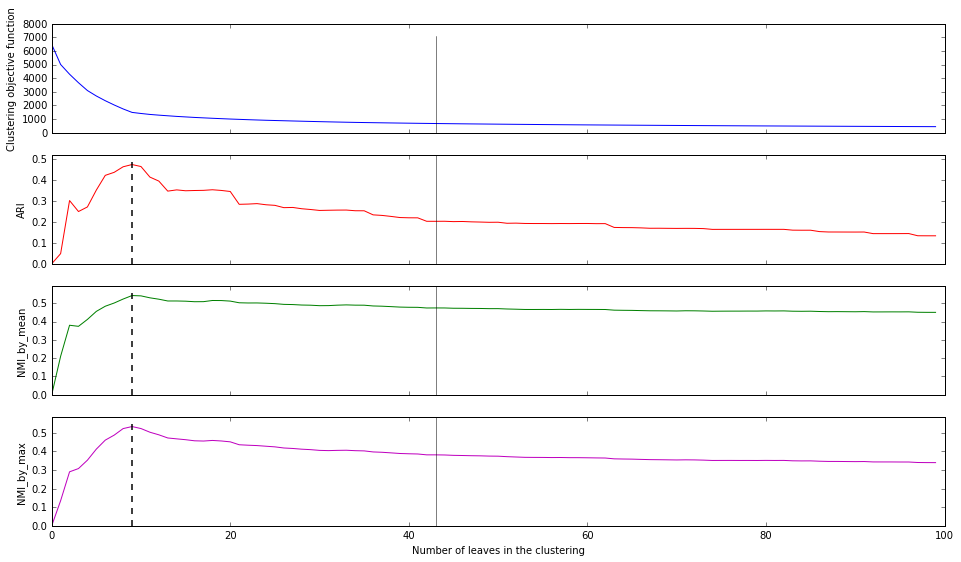

20_newsgroups_simple.mallet.5.topics.p


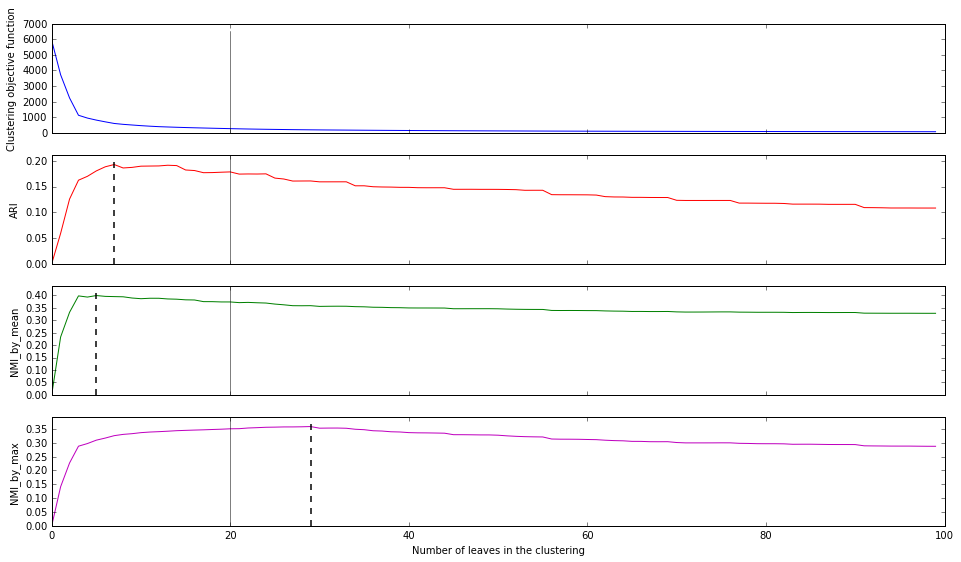

20_newsgroups_simple.mallet.80.topics.p


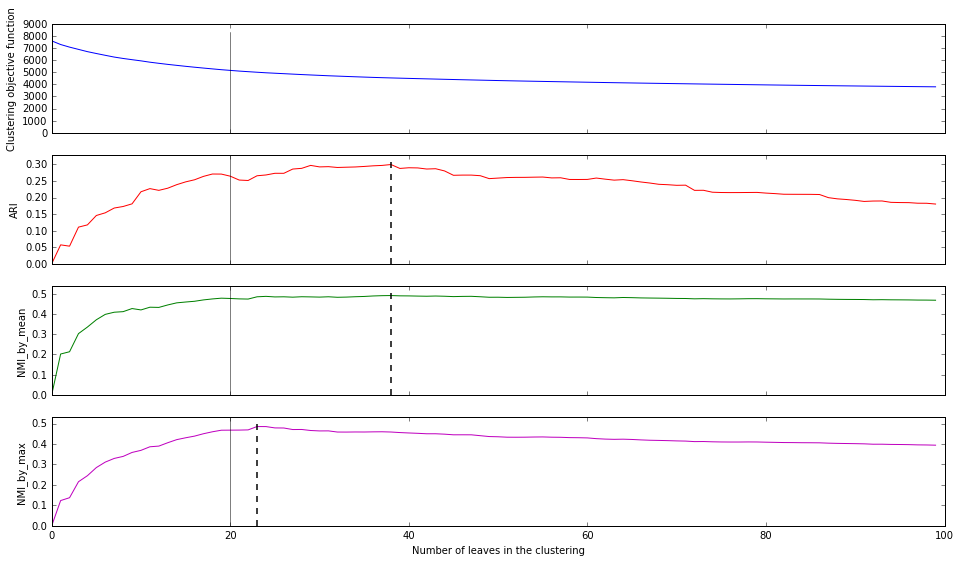

reuters_simple.p


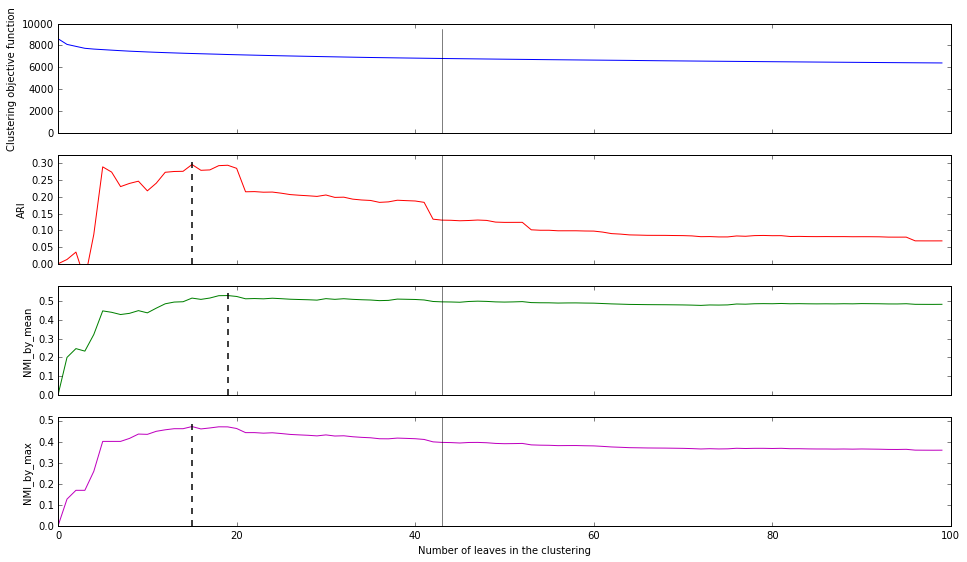

20_newsgroups_simple.mallet.20.topics.p


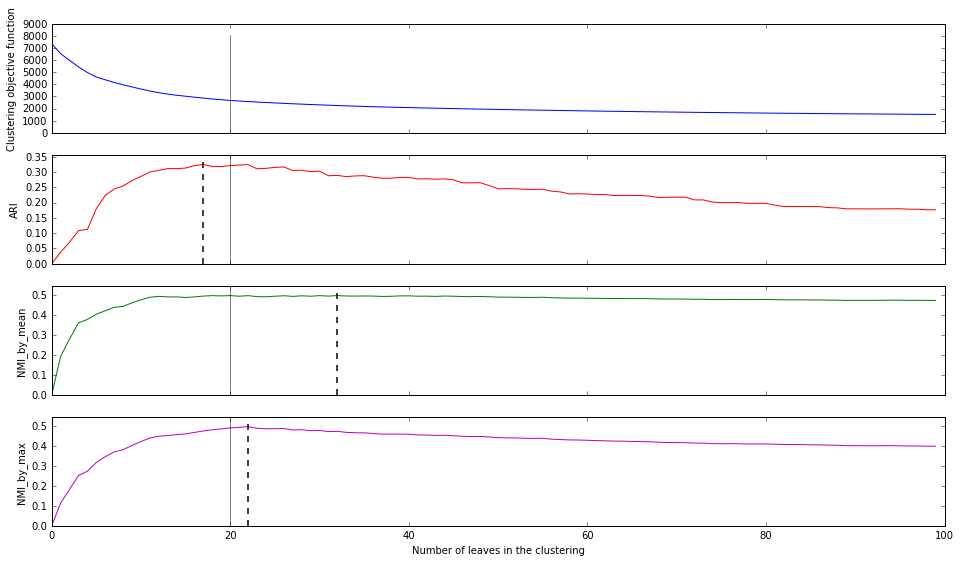

reuters_simple.mallet.80.topics.p


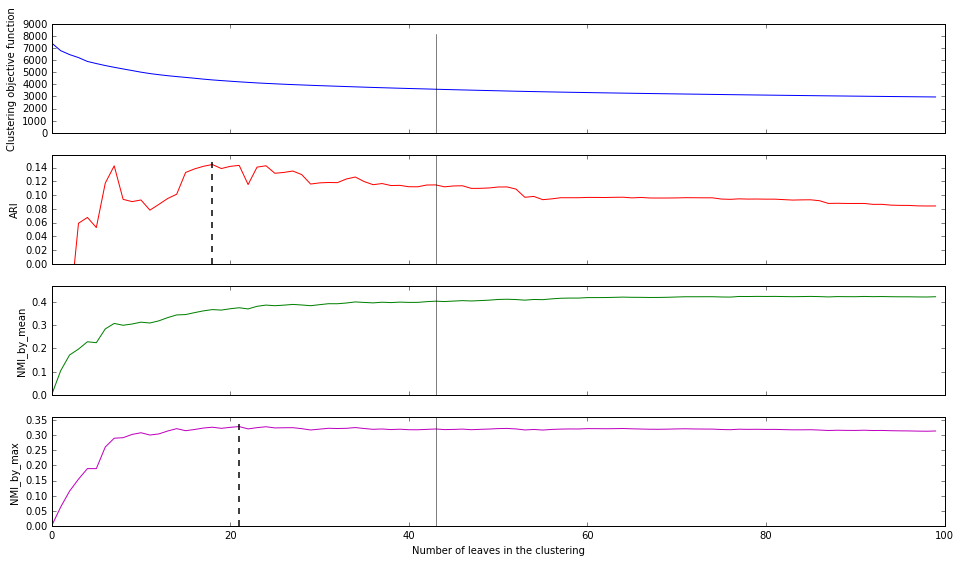

reuters_simple.mallet.5.topics.p


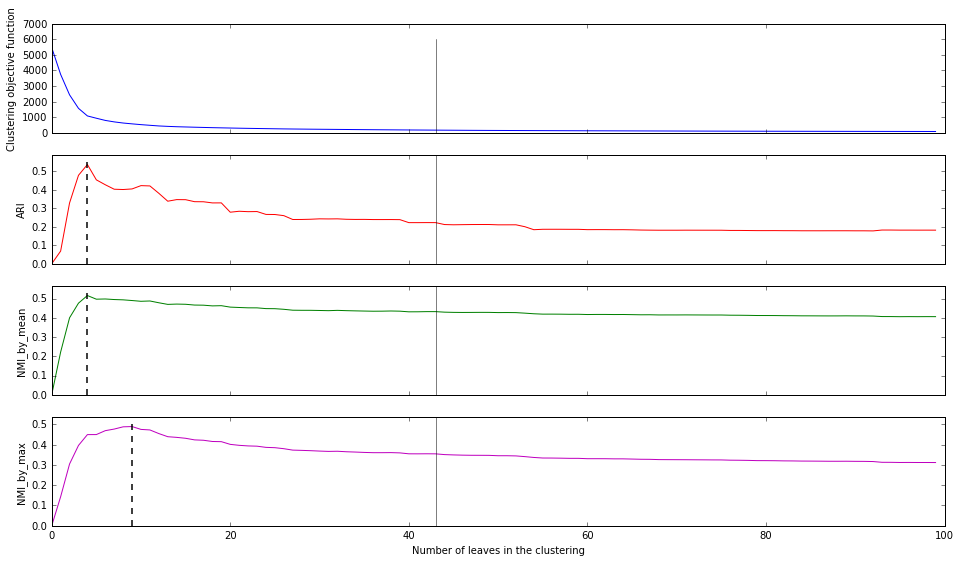

reuters_simple.mallet.20.topics.p


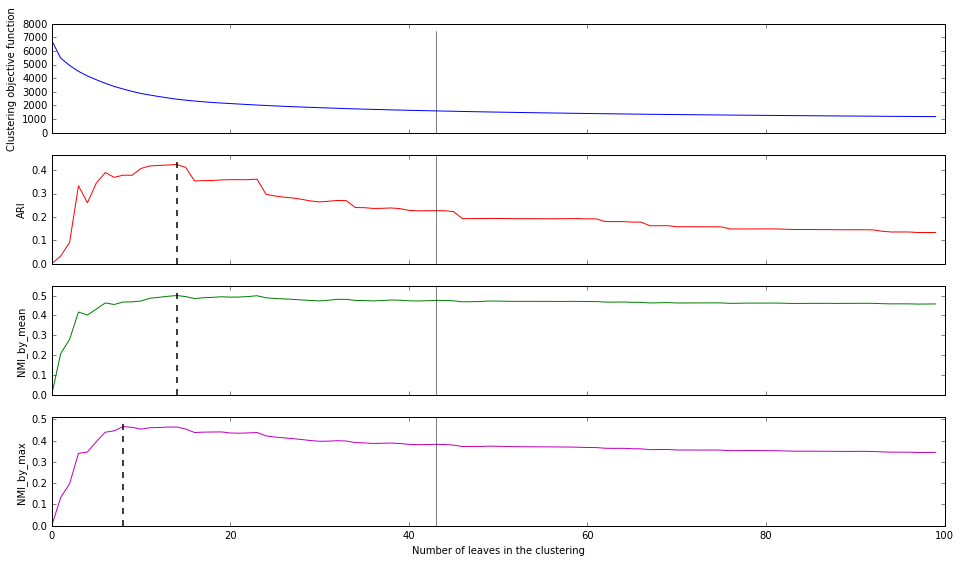

20_newsgroups_simple.mallet.160.topics.p


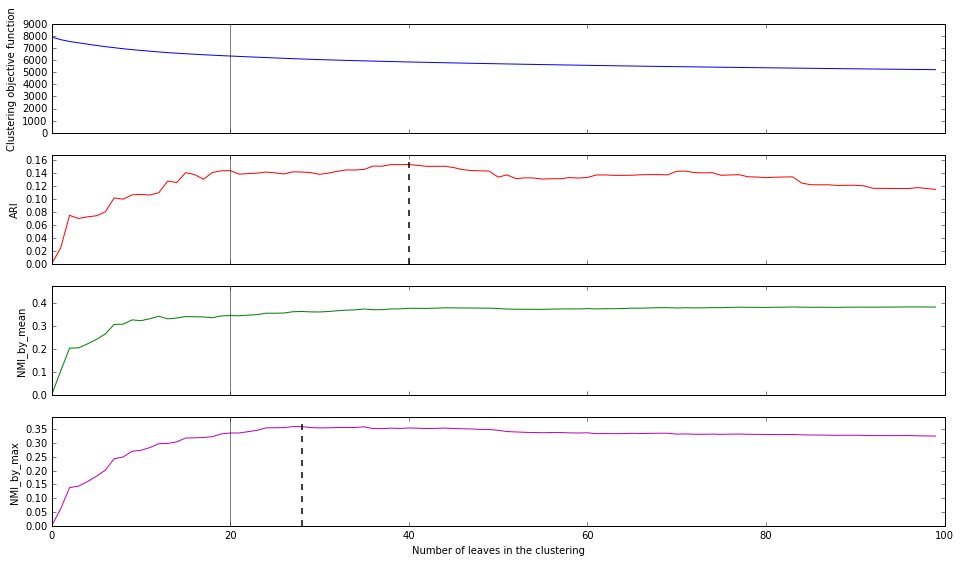

reuters_simple.mallet.160.topics.p


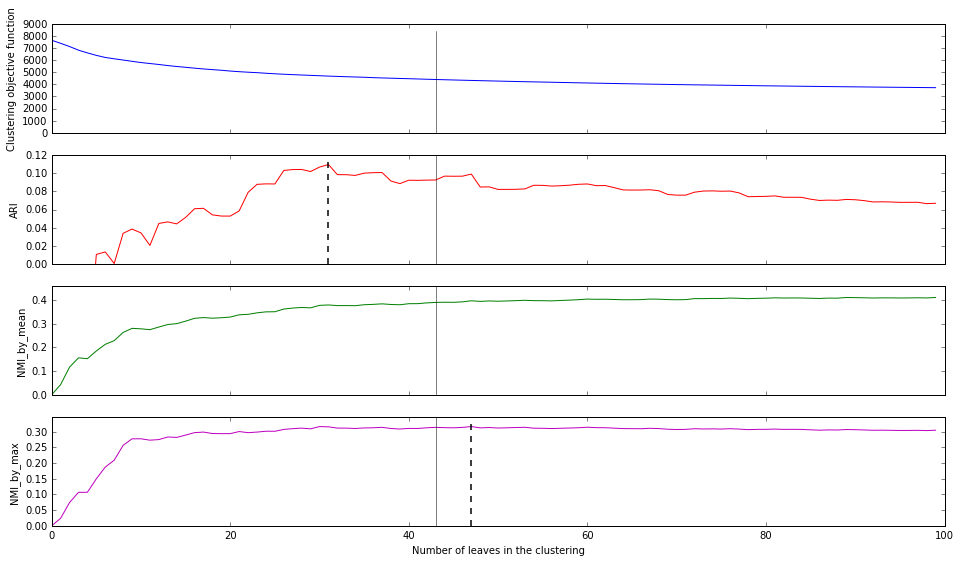

In [81]:
for name in results_files:
    print(name)
    results = df_from_results(os.path.join(results_dir,name))
    plot_metrics(name,results,metrics=['ARI','NMI_by_mean','NMI_by_max'])

In [34]:
results.columns

Index(['ARI', 'MI', 'NMI_by_geom_mean', 'NMI_by_max', 'NMI_by_mean',
       'objective'],
      dtype='object')

In [35]:
results_files[0]

'20_newsgroups_complex.mallet.160.topics.p'

In [21]:
from itertools import cycle

In [38]:
np.where(results.objective==results.objective.max())[0][0]

0